In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import time,math

def SIFTexp(direc, imgname1, num):
    sift = cv2.xfeatures2d.SIFT_create()
    img1 = cv2.imread(direc+imgname1+".png")
    imgname2 = imgname1+str(num)
    img2 = cv2.imread(direc+imgname2+".png")
    kp1, des1 = sift.detectAndCompute(img1,None) #des是描述子
    kp2, des2 = sift.detectAndCompute(img2,None)

    # BFMatcher解决匹配
    bf = cv2.BFMatcher(crossCheck=False)
    matches = bf.knnMatch(des1,des2, k=2)

    # 调整ratio
    good = []
    for m,n in matches:
        if m.distance < 0.2*n.distance:
            good.append(m)

    # 通过特征点坐标计算单应性矩阵H
    # （findHomography中使用了RANSAC算法剔初错误匹配）
    if len(good) > 1:
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
        H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        matchesMask = mask.ravel().tolist()

#         h,w = img1.shape[:2]
#         pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
#         dst = cv2.perspectiveTransform(pts,H)
#         img2_sqr = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

        # 匹配画图
        img_RANSAC = cv2.drawMatches(img1,kp1,img2,kp2,good,None,matchesMask=matchesMask,flags = 2)

        #输出RANSAC之前，RANSAC之后匹配点数
        print(">> KnnMatches: "+imgname2)
        #计算RANSAC之前平均距离
        dist = [m.distance for m in good]    
        print("   Before RANSAC: %d matching points, Average distance is " % (len(good))+str(np.mean(dist)))
        #计算RANSAC之后平均距离
        dist_ransac=[]
        for m in range(len(good)):
            dist_ransac.append(dist[m]*matchesMask[m])
        print("   After  RANSAC: %d matching points, Average distance is " % (np.count_nonzero(matchesMask))+str(np.mean(dist_ransac)))
        
        #计算matches的平均距离
        matches = bf.match(des1,des2)
        dist_matches = [m.distance for m in matches]
        print(">> matches: %d matching points, Average distance is "% (len(dist_matches))+str(np.mean(dist_matches)))
        
        plt.figure(figsize=(10,10))
        plt.imshow(cv2.cvtColor(img_RANSAC, cv2.COLOR_BGR2RGB))
        plt.show()
        
    else:
        img_out = cv2.drawMatches(img1,kp1,img2,kp2,good,None)
        print(">> KnnMatches: "+imgname2)
        print("   Before RANSAC: 0 matching points, Average distance is 10000")
        print("   After  RANSAC: 0 matching points, Average distance is 10000")
        
        #计算平均距离
        matches = bf.match(des1,des2)
        dist_matches = [m.distance for m in matches]
        print(">> matches: %d matching points, Average distance is "% (len(dist_matches))+str(np.mean(dist_matches)))
        
        plt.figure(figsize=(10,10))
        plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
        plt.show()

>> KnnMatches: PLAZA15
   Before RANSAC: 583 matching points, Average distance is 37.50249449630135
   After  RANSAC: 583 matching points, Average distance is 37.50249449630135
>> matches: 2092 matching points, Average distance is 118.75071896057057


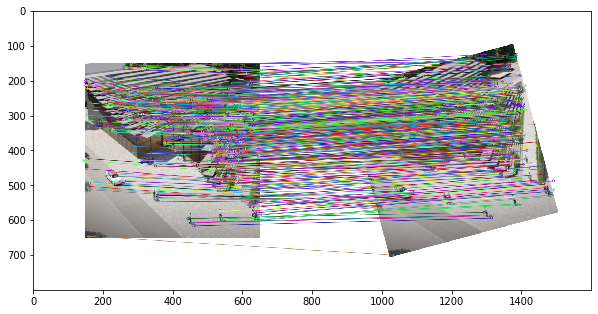

>> KnnMatches: PLAZA30
   Before RANSAC: 684 matching points, Average distance is 35.54887163778495
   After  RANSAC: 684 matching points, Average distance is 35.54887163778495
>> matches: 2092 matching points, Average distance is 114.79957371619646


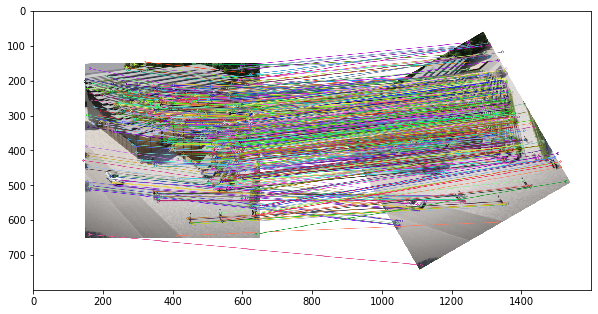

>> KnnMatches: PLAZA45
   Before RANSAC: 546 matching points, Average distance is 37.47784709406423
   After  RANSAC: 511 matching points, Average distance is 35.25089347755516
>> matches: 2092 matching points, Average distance is 118.01884047023196


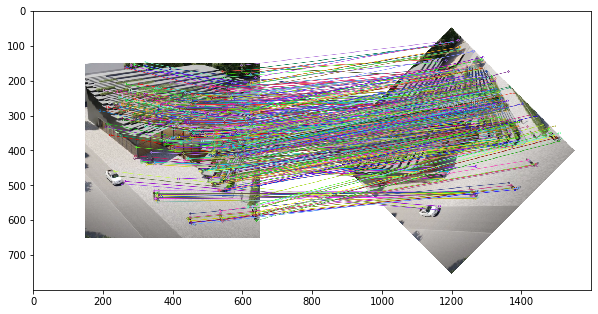

>> KnnMatches: PLAZA60
   Before RANSAC: 694 matching points, Average distance is 35.19874132332266
   After  RANSAC: 679 matching points, Average distance is 34.42493536149391
>> matches: 2092 matching points, Average distance is 116.22988939285278


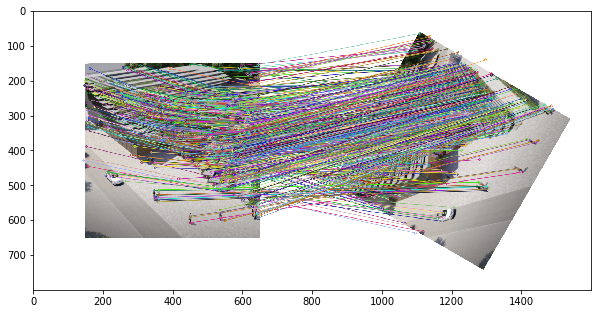

>> KnnMatches: PLAZA75
   Before RANSAC: 558 matching points, Average distance is 38.026510853921216
   After  RANSAC: 558 matching points, Average distance is 38.026510853921216
>> matches: 2092 matching points, Average distance is 120.9697575733265


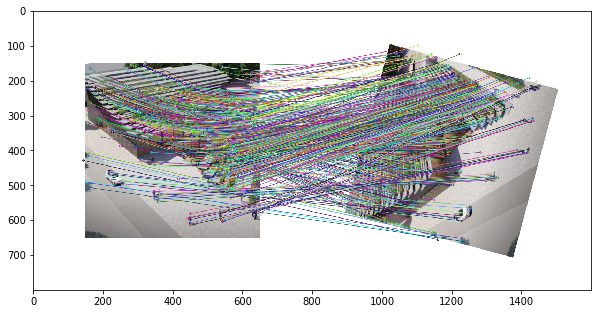

>> KnnMatches: PLAZA90
   Before RANSAC: 1827 matching points, Average distance is 5.904264759939097
   After  RANSAC: 1827 matching points, Average distance is 5.904264759939097
>> matches: 2092 matching points, Average distance is 26.09500233740697


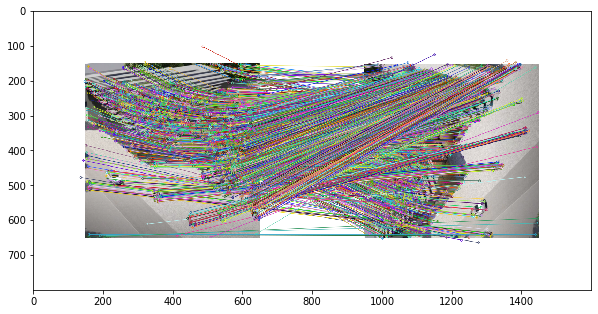

>> KnnMatches: PLAZA105
   Before RANSAC: 552 matching points, Average distance is 37.42543131890504
   After  RANSAC: 550 matching points, Average distance is 37.36498504099639
>> matches: 2092 matching points, Average distance is 121.07321010857649


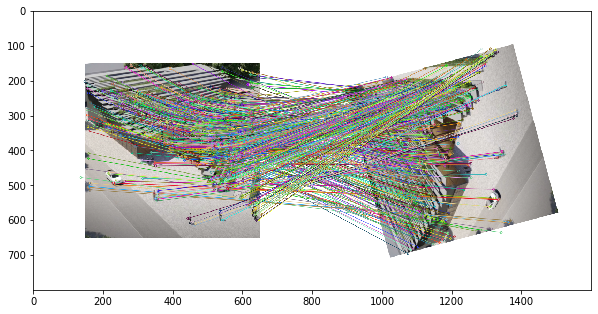

>> KnnMatches: PLAZA120
   Before RANSAC: 689 matching points, Average distance is 34.766763947352615
   After  RANSAC: 689 matching points, Average distance is 34.766763947352615
>> matches: 2092 matching points, Average distance is 113.60761424095635


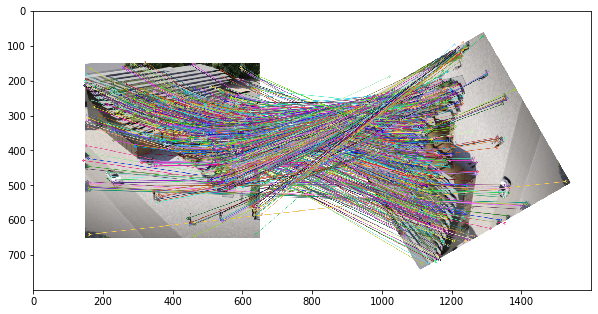

>> KnnMatches: PLAZA135
   Before RANSAC: 525 matching points, Average distance is 38.52331487564813
   After  RANSAC: 525 matching points, Average distance is 38.52331487564813
>> matches: 2092 matching points, Average distance is 118.74659805771954


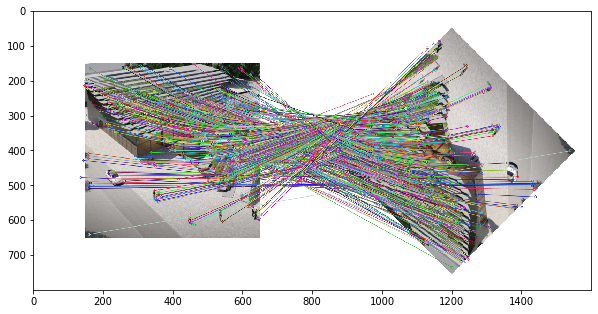

>> KnnMatches: PLAZA150
   Before RANSAC: 675 matching points, Average distance is 35.26474852809199
   After  RANSAC: 674 matching points, Average distance is 35.22555221133762
>> matches: 2092 matching points, Average distance is 116.99553209919318


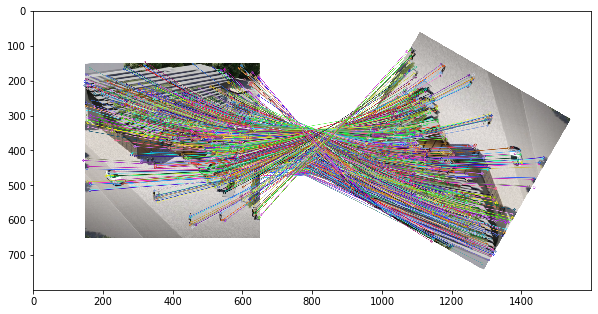

>> KnnMatches: PLAZA165
   Before RANSAC: 579 matching points, Average distance is 38.07906138464577
   After  RANSAC: 574 matching points, Average distance is 37.673011857199135
>> matches: 2092 matching points, Average distance is 119.31215545050729


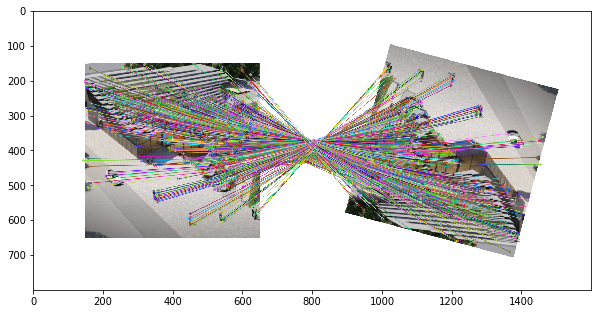

>> KnnMatches: PLAZA180
   Before RANSAC: 1660 matching points, Average distance is 4.755258815834321
   After  RANSAC: 1660 matching points, Average distance is 4.755258815834321
>> matches: 2092 matching points, Average distance is 33.27340019729352


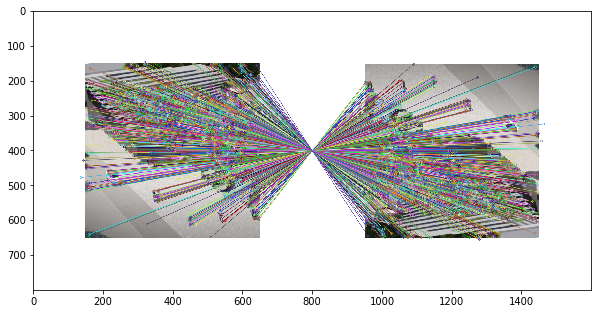

In [6]:
direc = "../Images/"
imgname = "PLAZA"

for num in range(15,195,15):
    SIFTexp(direc, imgname, num)